<a href="https://colab.research.google.com/github/Int-Group-44/flowers-102/blob/main/OxfordFlowers102CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
dataset_info
test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']

In [3]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

print(gpus)

Physical devices cannot be modified after being initialized
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Importing TensorFlow 

In [4]:
num_classes = dataset_info.features['label'].num_classes
num_training_examples = 1020
num_validation_examples = 1020

In [5]:
IMAGE_RES = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    #label = tf.one_hot(label, depth=num_classes)
    return image, label
BATCH_SIZE = 16
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.shuffle(num_validation_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_set.map(format_image).batch(BATCH_SIZE).prefetch(1)


In [12]:
def make_model(input_shape, num_classes):
  model = tf.keras.Sequential()
  model.add(layers.RandomFlip("horizontal_and_vertical", input_shape=input_shape))
  model.add(layers.RandomRotation(20))
  model.add(layers.RandomZoom(0.2))
  model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(num_classes))
  return model


In [13]:
tf.keras.backend.clear_session()
model = make_model(input_shape=(IMAGE_RES, IMAGE_RES) + (3,), num_classes=102)

In [14]:

#keras.utils.plot_model(model, show_shapes=True)

epochs = 50

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=validation_batches,
    batch_size=BATCH_SIZE,
    validation_batch_size=BATCH_SIZE,
    verbose=1
    #callbacks=[reduce_lr]
)

Epoch 1/50
64/64 [==============================] - 63s 188ms/step - loss: 5.2323 - accuracy: 0.0137 - val_loss: 4.6724 - val_accuracy: 0.0059
Epoch 2/50
64/64 [==============================] - 10s 148ms/step - loss: 4.7226 - accuracy: 0.0275 - val_loss: 4.7046 - val_accuracy: 0.0098
Epoch 3/50
64/64 [==============================] - 10s 146ms/step - loss: 4.5052 - accuracy: 0.0314 - val_loss: 4.8012 - val_accuracy: 0.0098
Epoch 4/50
64/64 [==============================] - 9s 133ms/step - loss: 4.4334 - accuracy: 0.0500 - val_loss: 4.9940 - val_accuracy: 0.0157
Epoch 5/50
64/64 [==============================] - 10s 144ms/step - loss: 4.3269 - accuracy: 0.0618 - val_loss: 4.8049 - val_accuracy: 0.0176
Epoch 6/50
64/64 [==============================] - 10s 144ms/step - loss: 4.1884 - accuracy: 0.0824 - val_loss: 4.6656 - val_accuracy: 0.0314
Epoch 7/50
64/64 [==============================] - 10s 152ms/step - loss: 4.0826 - accuracy: 0.0804 - val_loss: 4.2302 - val_accuracy: 0.0745


In [15]:
tloss1 = history.history['loss']
vloss1 = history.history['val_loss']
tacc1 = history.history['accuracy']
vacc1 = history.history['val_accuracy']

In [16]:

#keras.utils.plot_model(model, show_shapes=True)

epochs = 50

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=validation_batches,
    batch_size=BATCH_SIZE,
    validation_batch_size=BATCH_SIZE,
    verbose=1
    #callbacks=[reduce_lr]
)

Epoch 1/50
64/64 [==============================] - 18s 148ms/step - loss: 1.3438 - accuracy: 0.6147 - val_loss: 2.9429 - val_accuracy: 0.3922
Epoch 2/50
64/64 [==============================] - 9s 140ms/step - loss: 1.1552 - accuracy: 0.6716 - val_loss: 2.8892 - val_accuracy: 0.4147
Epoch 3/50
64/64 [==============================] - 12s 180ms/step - loss: 1.0207 - accuracy: 0.6961 - val_loss: 2.9408 - val_accuracy: 0.4108
Epoch 4/50
64/64 [==============================] - 9s 142ms/step - loss: 1.1307 - accuracy: 0.6667 - val_loss: 2.9214 - val_accuracy: 0.4157
Epoch 5/50
64/64 [==============================] - 9s 133ms/step - loss: 1.0048 - accuracy: 0.7059 - val_loss: 2.9335 - val_accuracy: 0.4167
Epoch 6/50
64/64 [==============================] - 9s 137ms/step - loss: 1.0078 - accuracy: 0.7108 - val_loss: 2.9116 - val_accuracy: 0.4245
Epoch 7/50
64/64 [==============================] - 9s 135ms/step - loss: 1.0308 - accuracy: 0.7069 - val_loss: 2.8848 - val_accuracy: 0.4235
Epoc

TypeError: ignored

In [ ]:
tloss2 = history.history['loss']
vloss2 = history.history['val_loss']
tacc2 = history.history['accuracy']
vacc2 = history.history['val_accuracy']

In [ ]:
model.save('OxfordFlowers102-2.keras')

In [18]:
test_loss, test_acc = model.evaluate(test_batches, verbose=1, batch_size=BATCH_SIZE)
print("Test accuracy:", test_acc)

385/385 [==============================] - 14s 35ms/step - loss: 3.3065 - accuracy: 0.3869
Test accuracy: 0.386892169713974


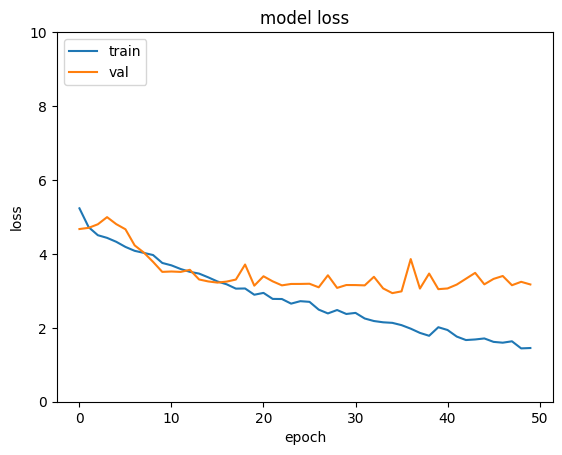

In [17]:
plt.plot(tloss1)
plt.ylim(0,10)
plt.plot(vloss1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc="upper left")
plt.show()

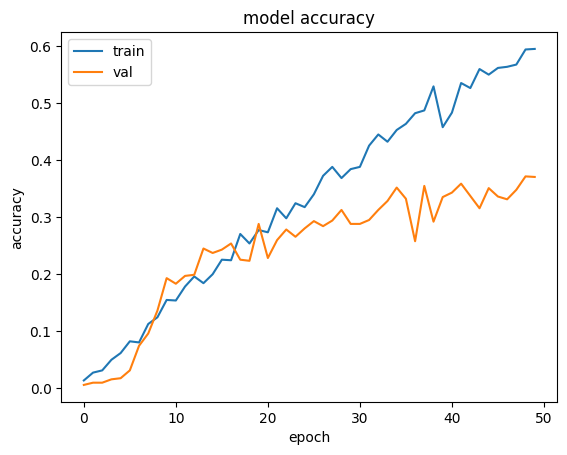

In [19]:
plt.plot(tacc1)
plt.plot(vacc1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc="upper left")
plt.show()